In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [2]:
data = pd.read_csv("../../Data/creditcard.csv")
# data.info()

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
X
type(y)

numpy.ndarray

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
one_class = data[data.Class==1]
zero_class = data[data.Class==0]
print("one",one_class.shape)
print("zero",zero_class.shape)

one (492, 31)
zero (284315, 31)


In [6]:
X = data.drop("Class",axis=1)
Y = data.Class
# print(type(X))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [7]:
sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_resample(X,Y.ravel())
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(X_res,Y_res,random_state=42,test_size=.25)
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,102375.788494,-1.451969,2.364491,-4.986624,2.797598,-0.287922,-2.305603,-2.541376,0.652255,-0.990442,...,0.721098,0.880237,0.899407,-0.413101,-0.283811,0.356496,-0.091499,0.587414,0.099925,49.737924
568626,128738.316130,-2.802465,2.895895,-4.822457,3.052730,-1.731072,-0.452609,-2.499902,1.468519,-1.420010,...,-0.251915,0.915056,0.749788,0.117106,0.475785,-0.201769,-0.394768,0.075784,0.416436,157.098403
568627,8140.013287,0.602611,4.007126,-7.081217,6.856487,0.725372,-2.641995,-1.706827,0.644426,-2.231904,...,0.465854,0.388218,0.073218,0.207531,-0.254554,-0.887211,0.423961,0.581382,0.146837,1.000000
568628,129213.498413,0.237080,0.456593,-1.492206,3.143746,0.900272,-0.480468,-0.411927,0.095607,-1.310995,...,0.306629,0.400663,0.969221,0.264436,0.711058,-1.029446,2.133319,-0.073537,0.155265,23.796254


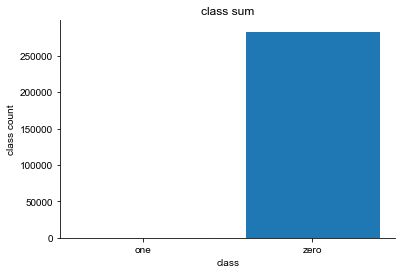

In [8]:
Class_num = [one_class.shape[0],zero_class.shape[0]]
x = ["one","zero"]
plt.title("class sum") # 圖的標題
plt.xlabel("class") 
plt.ylabel("class count")
sns.set(style = "white") 
sns.despine(top = True, right = True)  
plt.bar(x, Class_num) 
plt.show()

In [9]:
zero_undersampling = zero_class.sample(n=one_class.shape[0], random_state=1,replace=False)
zero_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26476,34090.0,1.384778,-0.613943,-0.473714,-1.080493,-0.134557,0.127233,-0.322239,-0.005842,-1.099339,...,-0.926508,-2.437317,0.107510,-1.453848,0.010721,0.602221,-0.085445,-0.006771,55.90,0
232704,147272.0,-0.662865,-0.063548,-0.453997,0.365725,-0.053082,-1.877818,1.369474,-0.415603,0.164133,...,0.319064,1.076870,0.572212,0.805659,-0.418046,-0.197208,0.118548,0.085739,173.05,0
161997,114733.0,-1.072320,-1.383812,1.110494,-3.057725,0.355135,-0.062749,-0.135126,-0.519193,-1.626258,...,-0.226405,0.265666,-0.437952,0.378339,-0.278275,-0.400838,-0.468408,-0.180677,88.00,0
176374,122737.0,-0.580157,0.568520,2.000309,-0.551757,0.202593,0.304296,0.763987,-0.039123,0.280374,...,-0.218156,-0.535974,-0.167347,0.548246,0.296848,-0.467760,-0.107231,-0.141449,49.98,0


In [10]:
undersampling_data = zero_undersampling.append(one_class)
undersampling_X = undersampling_data.drop("Class",axis=1)
undersampling_Y = undersampling_data.Class
x_undersampling_train,x_undersampling_test,y_undersampling_train,y_undersampling_test = train_test_split(undersampling_X,undersampling_Y,random_state=42,test_size=.25)
undersampling_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [11]:
one_oversampling = one_class.sample(n=zero_class.shape[0]-one_class.shape[0], random_state=1,replace=True)
one_oversampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9509,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
213092,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
15810,27252.0,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1
124036,77154.0,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,...,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,129.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88897,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.00,1
43773,41646.0,-3.240187,2.978122,-4.162314,3.869124,-3.645256,-0.126271,-4.744730,-0.065331,-2.168366,...,2.601441,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.421300,0.003146,172.32,1
243699,152036.0,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,-1.977238,...,0.476660,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1.00,1


In [12]:
oversampling_data = data.append(one_oversampling)
oversampling_X = oversampling_data.drop("Class",axis=1)
oversampling_Y = oversampling_data.Class
x_oversampling_train,x_oversampling_test,y_oversampling_train,y_oversampling_test = train_test_split(oversampling_X,oversampling_Y,random_state=42,test_size=.25)
oversampling_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88897,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.00,1
43773,41646.0,-3.240187,2.978122,-4.162314,3.869124,-3.645256,-0.126271,-4.744730,-0.065331,-2.168366,...,2.601441,0.231910,-0.036490,0.042640,-0.438330,-0.125821,0.421300,0.003146,172.32,1
243699,152036.0,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,-1.977238,...,0.476660,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1.00,1


new_zero 284315
new_ one 284315


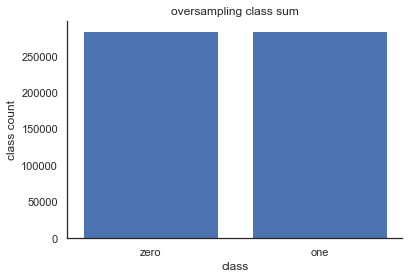

In [13]:
oversampling_zero_count = oversampling_data[oversampling_data.Class==0].shape[0]
oversampling_one_count = oversampling_data[oversampling_data.Class==1].shape[0]
print("new_zero",oversampling_zero_count)
print("new_ one",oversampling_one_count)
y = [oversampling_zero_count,oversampling_one_count]
x = ["zero","one"]
plt.title("oversampling class sum") # 圖的標題
plt.xlabel("class") 
plt.ylabel("class count")
sns.set(style = "white") 
sns.despine(top = True, right = True)  
plt.bar(x, y) 
plt.show() 

new_zero 492
new_ one 492


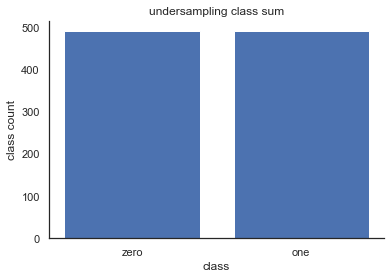

In [14]:
undersampling_zero_count = undersampling_data[undersampling_data.Class==0].shape[0]
undersampling_one_count = undersampling_data[undersampling_data.Class==1].shape[0]
print("new_zero",undersampling_zero_count)
print("new_ one",undersampling_one_count)
y = [undersampling_zero_count,undersampling_one_count]
x = ["zero","one"]
plt.title("undersampling class sum") # 圖的標題
plt.xlabel("class") 
plt.ylabel("class count")
sns.set(style = "white") 
sns.despine(top = True, right = True)  
plt.bar(x, y) 
plt.show() 

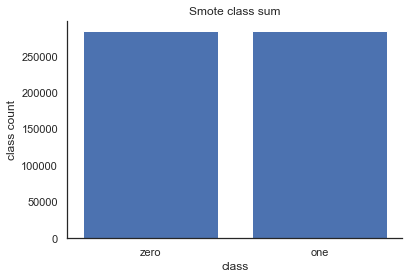

Counter({0: 284315, 1: 284315})

In [15]:
c = Counter(Y_res)
y = [c[0],c[1]]
x = ["zero","one"]
plt.title("Smote class sum") # 圖的標題
plt.xlabel("class") 
plt.ylabel("class count")
sns.set(style = "white") 
sns.despine(top = True, right = True)  
plt.bar(x, y) 
plt.show() 
c

<AxesSubplot:>

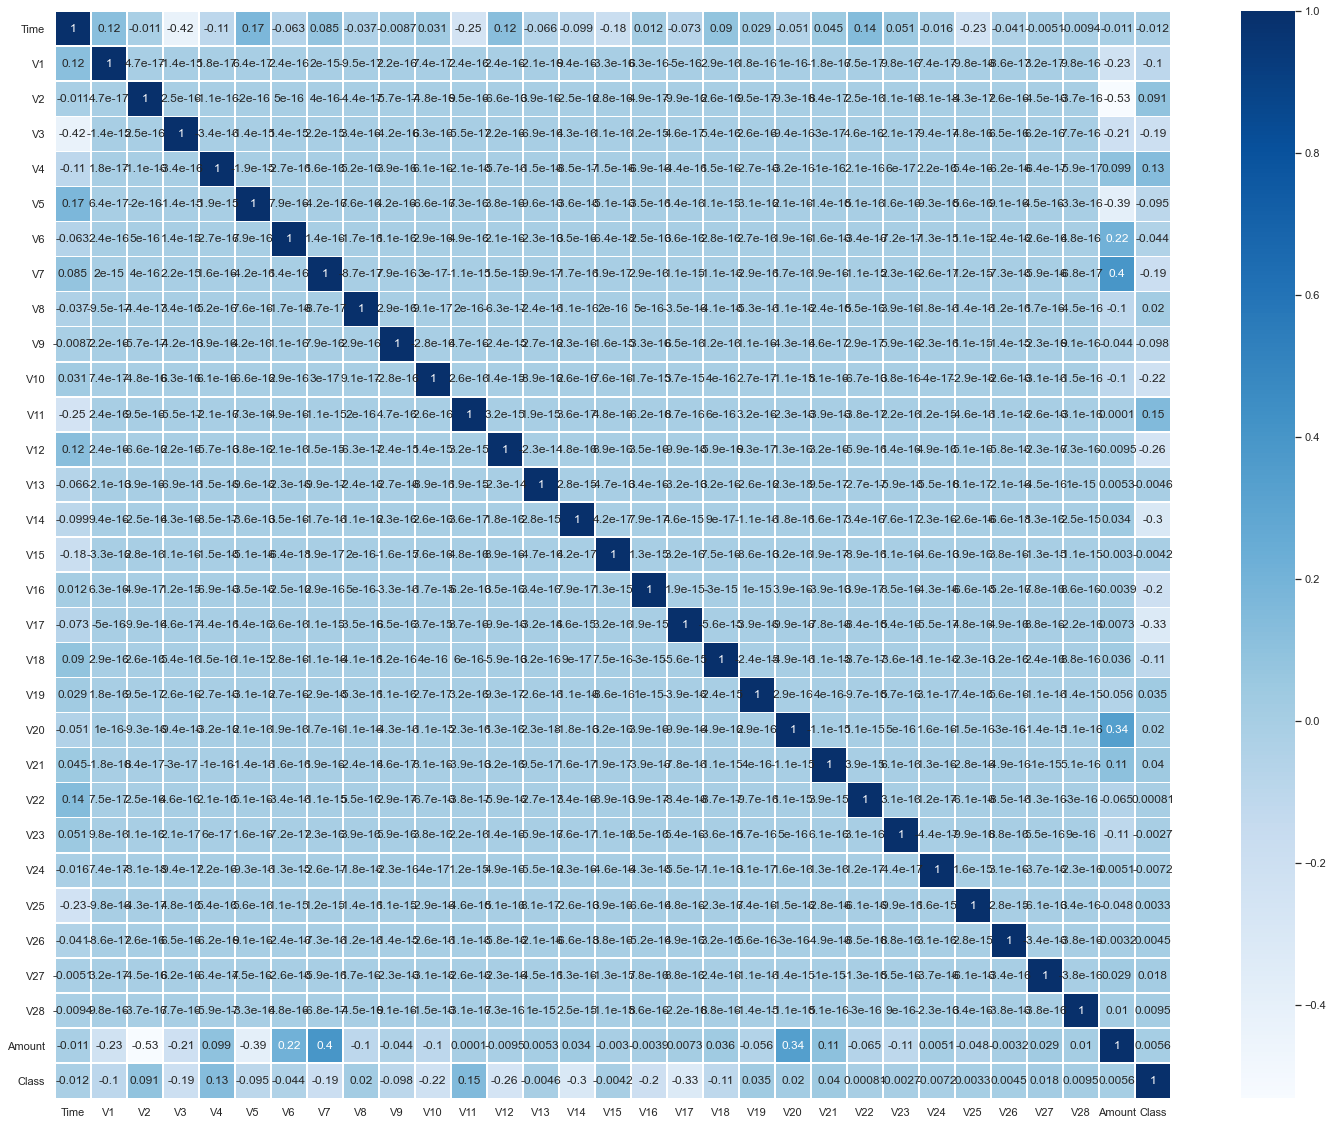

In [16]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), cmap='Blues',linewidths=.5,annot=True)

<AxesSubplot:>

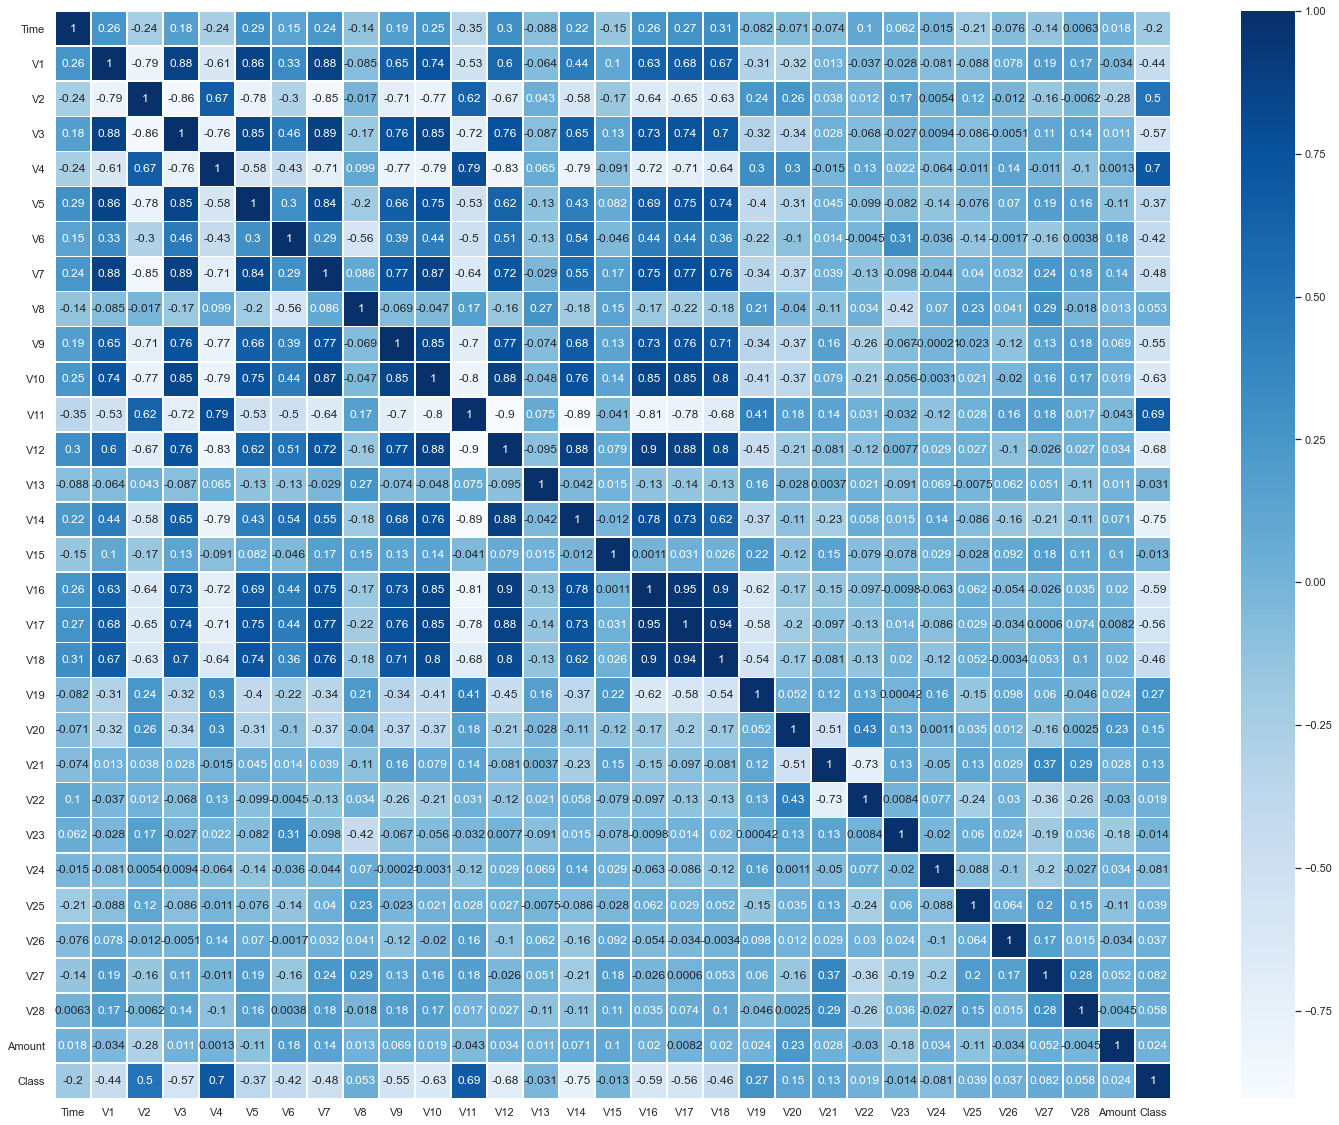

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(undersampling_data.corr(), cmap='Blues',linewidths=.5,annot=True)

<AxesSubplot:>

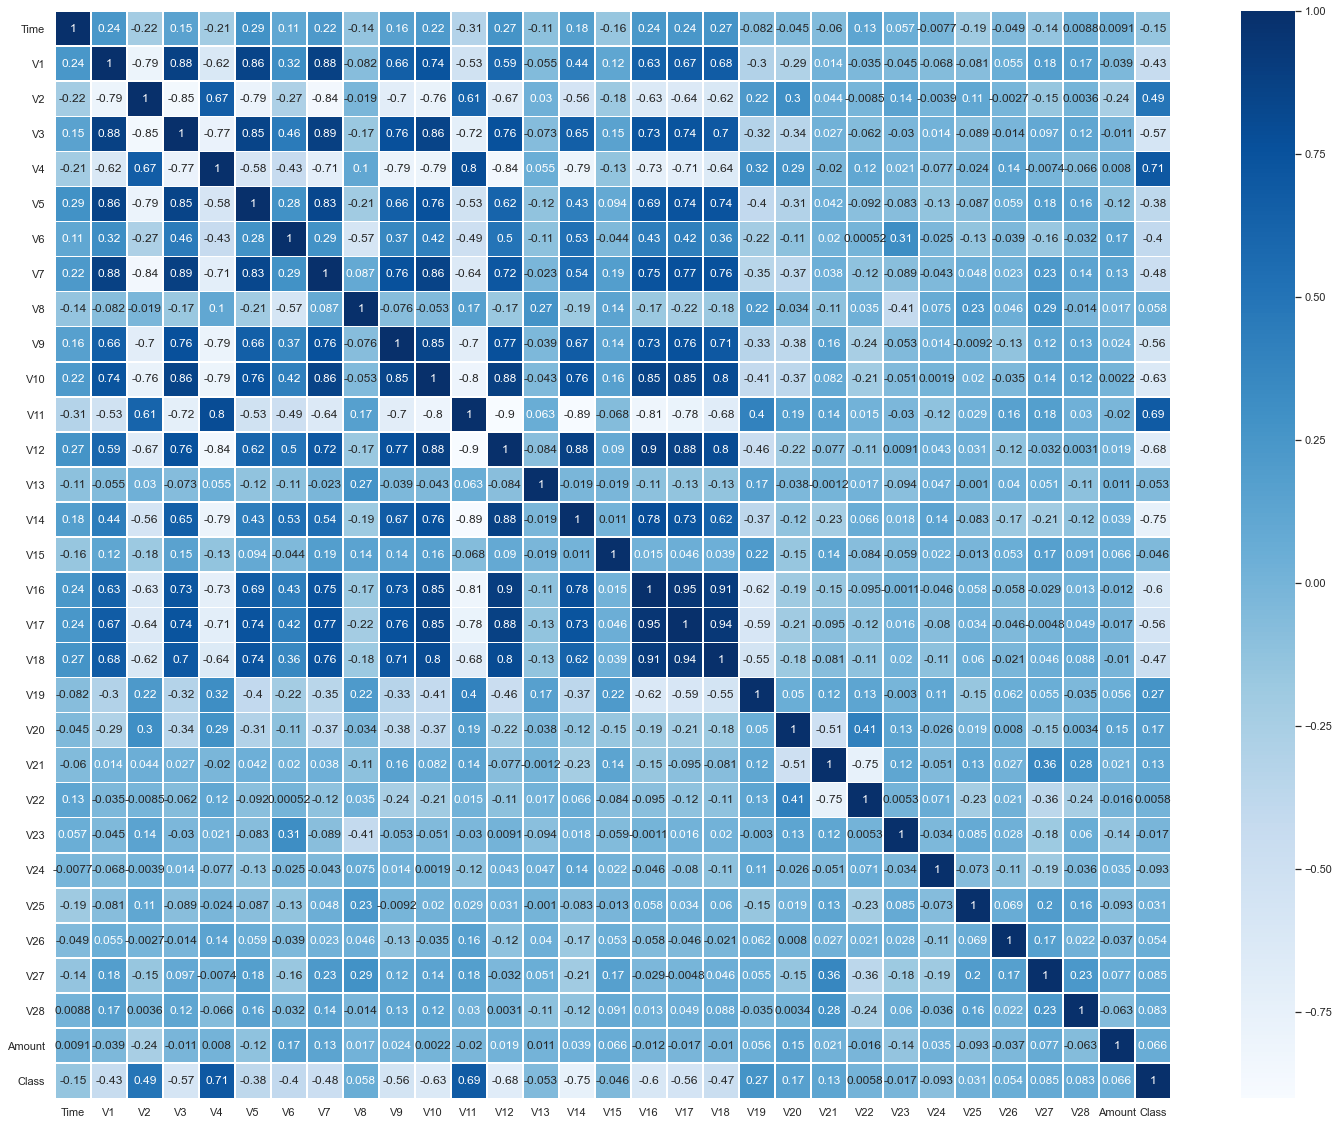

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(oversampling_data.corr(), cmap='Blues',linewidths=.5,annot=True)

In [19]:
#over sampling 
logistic_regr_over = LogisticRegression()
logistic_regr_over.fit(oversampling_X, oversampling_Y)
score = logistic_regr_over.score(x_oversampling_test, y_oversampling_test)
y_pred = logistic_regr_over.predict(x_oversampling_test)
conf = confusion_matrix(y_oversampling_test, y_pred)
clf_report = classification_report(y_oversampling_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.945666089843695
[[68605  2418]
 [ 5306 65829]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     71023
           1       0.96      0.93      0.94     71135

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158



In [20]:
#under sampling
logistic_regr_under = LogisticRegression()
logistic_regr_under.fit(undersampling_X, undersampling_Y)
score = logistic_regr_under.score(x_undersampling_test, y_undersampling_test)
y_pred = logistic_regr_under.predict(x_undersampling_test)
conf = confusion_matrix(y_undersampling_test, y_pred)
clf_report = classification_report(y_undersampling_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.9065040650406504
[[118   8]
 [ 15 105]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       126
           1       0.93      0.88      0.90       120

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246



In [21]:
#smote
logistic_regr_under = LogisticRegression(solver='lbfgs',max_iter=1000)
logistic_regr_under.fit(X_res, Y_res)
score = logistic_regr_under.score(x_smote_test, y_smote_test)
y_pred = logistic_regr_under.predict(x_smote_test)
conf = confusion_matrix(y_smote_test, y_pred)
clf_report = classification_report(y_smote_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.9750137171316423
[[69956  1067]
 [ 2485 68650]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     71023
           1       0.98      0.97      0.97     71135

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158

